# Rapport

**Nombre de lignes et de colonnes**:

    - Trainset: 24105 lignes et 5 colonnes
    - Testset: 10331 lignes et 5 colonnes
    
**Type de variables**:

    - variable à prédire:
        - note: quatitative discrête / qualitative ordinale (compris entre 1 et 5)
    - autres variables du dataset:
        - date: date au format date1 (01 janvier 2000) 'suite à une expérience en' date2 (mois année)
        - auteur: catégorielle
        - avis: test
        - assureur: catégorielle
        - produit: catégorielle

**Nombre de données manquantes**:

    - Trainset: 2 lignes comportent des données manquantes
    - Testset: 1 lignes comporte des données manquantes.
    - Décision : Etant donnée que très très peu de lignes de nos datasets sont NaN je décide de les drop.
    
**Analyses de la target**:
![Analyse-note.png](Analyse-note.png)

**Analyses des variables**

    - assureur:
![Analyse-assureurs.png](Analyse-assureurs.png)

    - produit:
![Analyse-produit.png](Analyse-produit.png)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_train = pd.read_csv('avisassurance_train.csv', sep=";")
data_test = pd.read_csv('avisassurance_test.csv', sep=";")

In [3]:
df = data_train.copy()
df_test = data_test.copy()

In [4]:
df.head()

,date,note,auteur,avis,assureur,produit
0,06 septem...,5,brahim--k-131532,"Meilleurs assurances, prix, solutions, écoute,...",Direct Assurance,auto
1,03 mai 20...,4,bernard-g-112497,"je suis globalement satisfait , sauf que vous ...",Direct Assurance,auto
2,21 mars 2...,5,virginie-t-107352,Prix tres abordable plusieurs options s'offren...,Direct Assurance,auto
3,10 juin 2...,4,boulain-f-116580,"je satisfait du service, une réponse très rapi...",L'olivier Assurance,auto
4,29 janvie...,1,ouaille31-51798,"Client depuis plus de 25 ans, très déçu de cet...",Matmut,auto


In [5]:
df.isna().sum()

date        0
note        0
auteur      1
avis        1
assureur    0
produit     0
dtype: int64

In [6]:
df.shape

(24105, 6)

In [7]:
df.dropna(axis=0).shape

(24103, 6)

In [8]:
df_test.shape

(10332, 5)

In [9]:
df_test.dropna(axis=0).shape

(10331, 5)

In [10]:
df = df.dropna(axis=0)
df_test = df.dropna(axis=0)

In [11]:
df.dtypes

date        object
note         int64
auteur      object
avis        object
assureur    object
produit     object
dtype: object

In [12]:
df.note.agg(['min','max'])

min    1
max    5
Name: note, dtype: int64

In [13]:
df[df.date.str.contains('suite à une expérience en')].shape == df.shape

True

In [14]:
df_test[df_test.date.str.contains('suite à une expérience en')].shape == df_test.shape

True

Note: on vérifie aussi que cela est vrai pour les données de test car on va rediviser la variable date en 2.

In [15]:
df.note.value_counts(normalize=True).sort_index()

1    0.301664
2    0.154172
3    0.140273
4    0.202672
5    0.201220
Name: note, dtype: float64

In [16]:
def percent_pie_chart(df, variable):
    idx = df[variable].value_counts(normalize=True)
    labels = idx.index
    sizes = idx.values

    p, tx, autotexts = plt.pie(sizes, labels=labels,
            autopct="")

    for i, a in enumerate(autotexts):
        a.set_text("{0:2.0f}%".format(sizes[i]*100))

    plt.axis('equal')
    plt.savefig('Analyse-'+variable+'.png')
    plt.show()

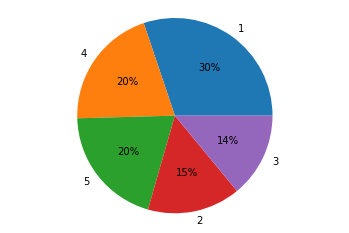

In [17]:
percent_pie_chart(df, 'note')

**Observation des variables catégorielles**

In [18]:
df.auteur.value_counts()

mikado-50419            4
mm-53953                4
pj-97010                4
tontonbubu-54321        4
lotus5-51217            3
                       ..
elya973-80260           1
jean-pierre-s-137446    1
sass-117513             1
marco14-138660          1
jesse-51459             1
Name: auteur, Length: 23675, dtype: int64

In [19]:
df.assureur.unique()

array(['Direct Assurance', "L'olivier Assurance", 'Matmut',
       'Néoliane Santé', 'APRIL', 'SantéVet', 'Mercer', 'Generali',
       'Allianz', 'APRIL Moto', 'Cegema Assurances', 'LCL', 'Afer',
       'Pacifica', 'SwissLife', 'MAAF', 'Solly Azar', 'GMF', 'AMV',
       'CNP Assurances', 'MAIF', 'Sogecap', 'Harmonie Mutuelle',
       'Mutuelle des Motards', 'MACIF', 'Eurofil', 'Active Assurances',
       'AXA', 'Sogessur', 'Ag2r La Mondiale', 'Mgen', "Zen'Up", 'MGP',
       'Intériale', 'Génération', 'Cardif', 'Santiane', 'Eca Assurances',
       'Groupama', "Assur O'Poil", 'MMA', 'MetLife', 'Crédit Mutuel',
       'Afi Esca', 'Gan', 'Magnolia', 'Suravenir', 'Assur Bon Plan',
       'AssurOnline', 'Carac', 'Mapa', 'Malakoff Humanis',
       'Euro-Assurance', 'Peyrac Assurances', 'Sma', 'Hiscox'],
      dtype=object)

<AxesSubplot:ylabel='assureur'>

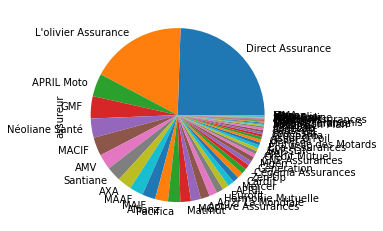

In [20]:
df.assureur.value_counts().plot.pie()

Faisons un pie chart plus lissible.

In [21]:
df.assureur.value_counts(normalize=True).sort_values(ascending=False)

Direct Assurance        0.244617
L'olivier Assurance     0.177903
APRIL Moto              0.042443
GMF                     0.041364
Néoliane Santé          0.035722
MACIF                   0.034394
AMV                     0.028544
Santiane                0.027300
AXA                     0.026096
MAAF                    0.025391
MAIF                    0.024520
Allianz                 0.023814
Pacifica                0.022943
Matmut                  0.019666
MGP                     0.018504
Active Assurances       0.016720
Ag2r La Mondiale        0.014521
Harmonie Mutuelle       0.012944
Eurofil                 0.011990
APRIL                   0.011741
Mercer                  0.011077
Cardif                  0.010994
Zen'Up                  0.010165
Cegema Assurances       0.008879
Génération              0.008796
Mgen                    0.008671
CNP Assurances          0.006099
Crédit Mutuel           0.006057
Afer                    0.005974
SwissLife               0.005725
Eca Assura

In [22]:
df.assureur.value_counts(normalize=True).loc[lambda x: x>0.02].index

Index(['Direct Assurance', 'L'olivier Assurance', 'APRIL Moto', 'GMF',
       'Néoliane Santé', 'MACIF', 'AMV', 'Santiane', 'AXA', 'MAAF', 'MAIF',
       'Allianz', 'Pacifica'],
      dtype='object')

In [23]:
def filter_percent_threshold(df, variable, threshold):
    df_ = df.copy()
    counts = df_[variable].value_counts(normalize=True)
    idx = counts[counts.lt(threshold)].index

    df_.loc[df_[variable].isin(idx), variable] = 'Autres'
    return df_

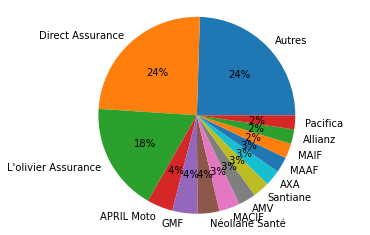

In [24]:
df_plot = filter_percent_threshold(df, 'assureur', 0.02)
percent_pie_chart(df_plot, 'assureur')

In [25]:
df.produit.unique()

array(['auto', 'sante', 'animaux', 'vie', 'moto', 'credit', 'habitation',
       'prevoyance', 'responsabilite-civile-professionnelle',
       'multirisque-professionnelle', 'assurances-professionnelles',
       'garantie-decennale', 'flotte-automobile'], dtype=object)

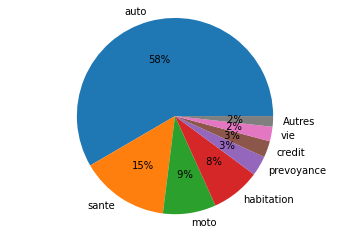

In [28]:
df_plot = filter_percent_threshold(df, 'produit', 0.02)
percent_pie_chart(df_plot, 'produit')